# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>MUSTAFA BİRDAL</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv
df = pd.read_csv("diamonds.csv")
df1 = df.copy()
df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [4]:
df.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Exploratory Data Analysis

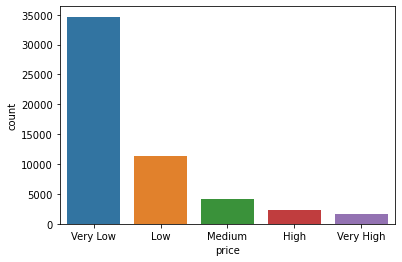

In [5]:
# Hedef değişken içindeki sınıfların dağılımı;
# Grafikte de görüldüğü gibi hedef değişkendeki sınıflar dengesiz şekilde dağılmıştır.
# Preprocessing aşamasında SMOTE tekniği uygulanarak bu durumun oluşturabileceği olumsuz etkileri azaltmaya çalışacağzı.
sns.countplot(data=df, x= "price");

In [6]:
# değişkenlere ait temel istatistik bilgiler;
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,53940,NaN,NaN,NaN,26970.5,15571.3,1,13485.8,26970.5,40455.2,53940
carat,53940,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940,NaN,NaN,NaN,61.7494,1.43262,43,61,61.8,62.5,79
table,53940,NaN,NaN,NaN,57.4572,2.23449,43,56,57,59,95
x,53940,NaN,NaN,NaN,5.73116,1.12176,0,4.71,5.7,6.54,10.74
y,53940,NaN,NaN,NaN,5.73453,1.14213,0,4.72,5.71,6.54,58.9
z,53940,NaN,NaN,NaN,3.53873,0.705699,0,2.91,3.53,4.04,31.8


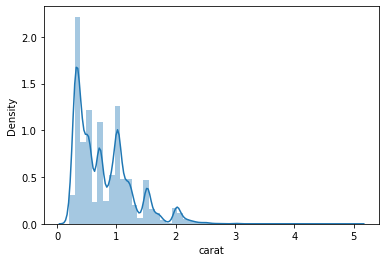

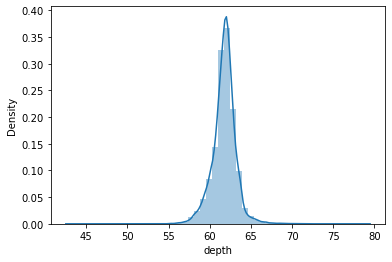

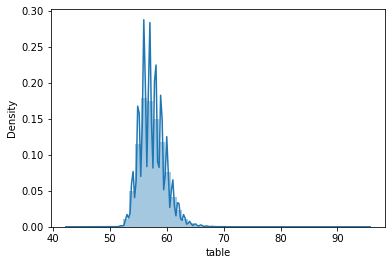

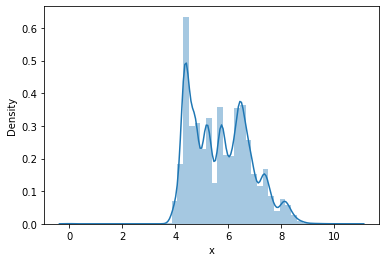

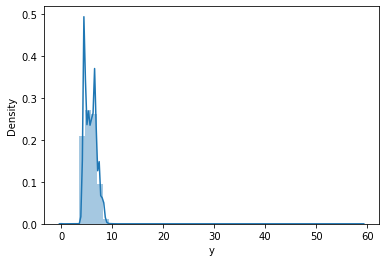

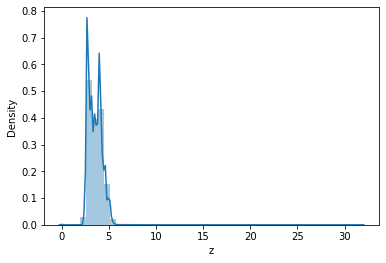

In [7]:
# Continous değişkenlerin dağılım grafikleri;
df_numerics = df[["carat","depth","table","x","y","z"]]

for i in df_numerics.columns:
    sns.distplot(df_numerics[i])
    plt.show()

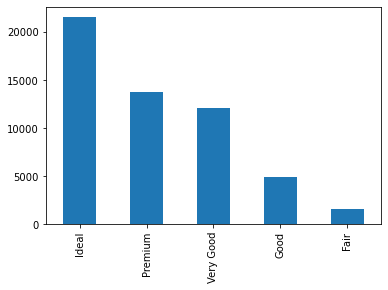

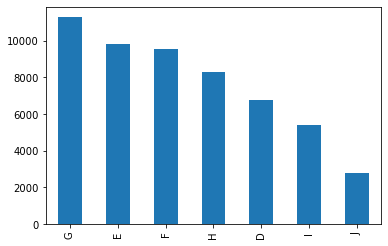

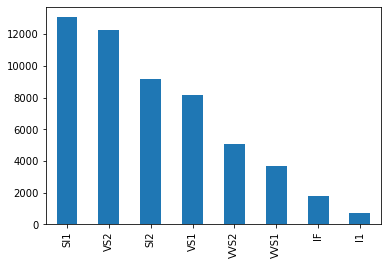

In [8]:
# Kategorik değişkenlerin frekans dağılımları;
df_categoricals = df[["cut","color","clarity"]]

for i in df_categoricals.columns:
    df[i].value_counts().plot.bar()
    plt.show()

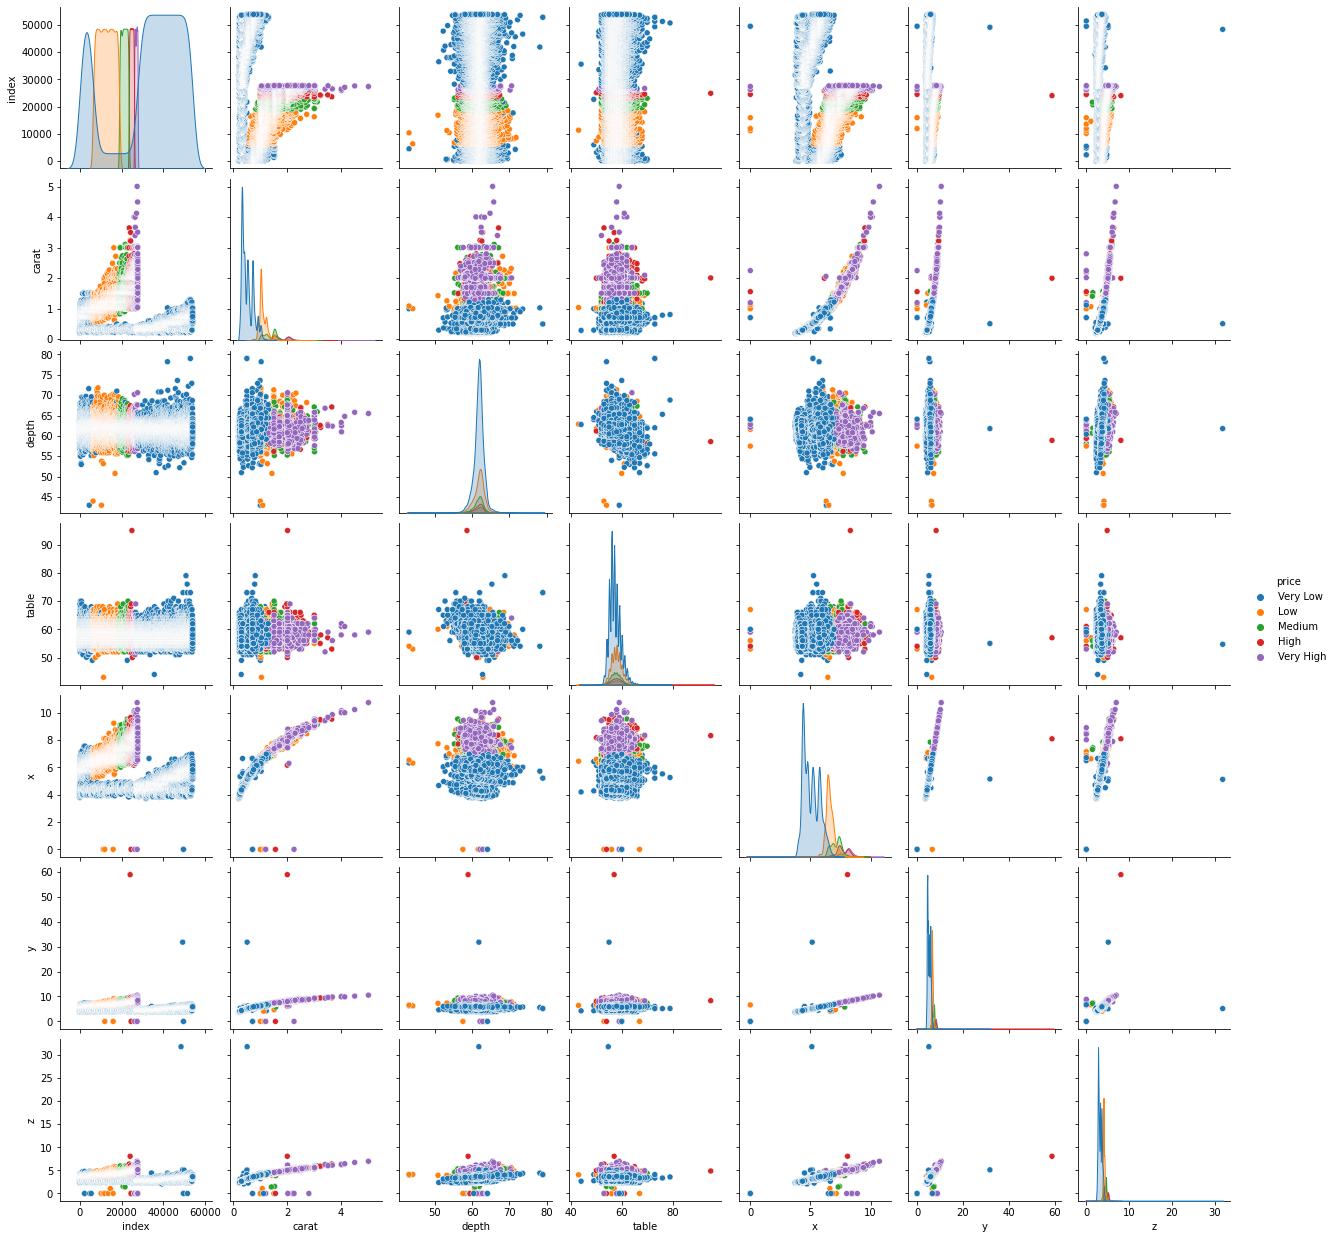

In [9]:
sns.pairplot(df,hue="price");

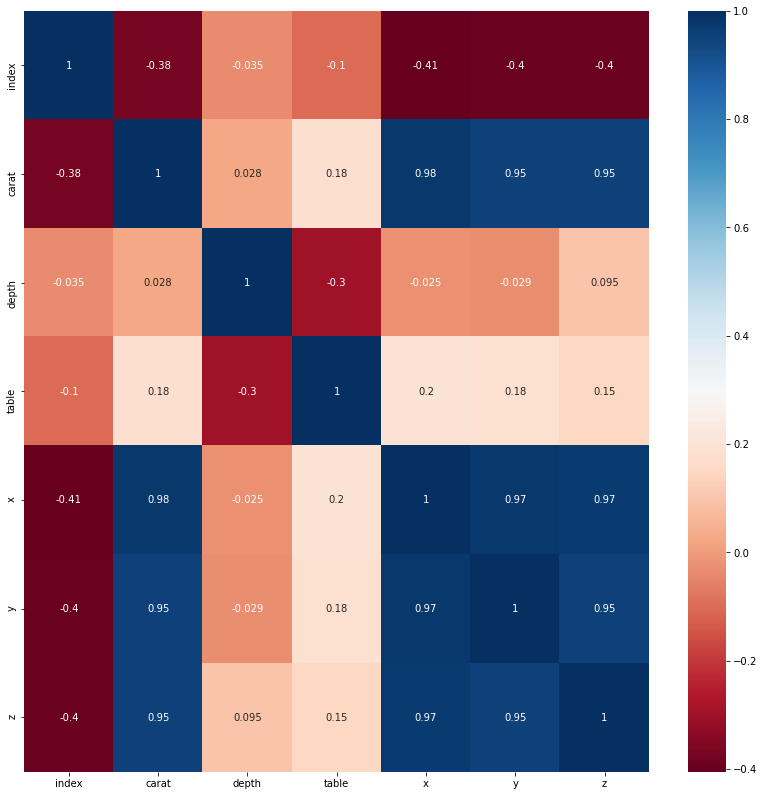

In [10]:
# Korelasyon matrix'i;
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(),cmap="RdBu",annot=True);

In [11]:
# x,y,z ve carat isimli değişkenler arasında yüksek korelasyon görülmektedir.
# Bu bağlamda x,y ve z isimli değişkenlerin veri setinden atılmasına karar verilmiştir.
# Ayrıca "index" kolonu da model üzerinde herhangi bir etki sağlamayacağı için veri setinden atılmıştır.

df.drop(["x","y","z","index"],axis=1,inplace=True)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [12]:
# Duplicated gözlem bulunmamaktadır.
df.duplicated().any()

True

In [13]:
# Continous değerlerdeki aykırı gözlemler IsoliationForest algoritması yardımıyla veriden atılmıştır.

iso = IsolationForest(random_state=42)
outliers = iso.fit_predict(df[["table","depth","carat"]])
non_outliers_index = outliers != -1
df = df[non_outliers_index]

* Kullanılacak algoritma ve değişkenlerin değer aralıkları göze alındığında herhangi bir scaling işleminin uygulanmamasına karar verilmiştir.  
* Bununla birlikte "carat" isimli değişkendeki değerlerin logaritması alınarak dağılımını olabildiğince Normal Dağılımı formuna getirmeye çalışacağız. Ayrıca diğer continous değişkenlerin Normal dağılıma sahip olduğu düşünüldüğü için onlar üzerinde herhangi bir müdahale yapılmayacaktır. Bu işlemin ileride kullanacağımız Logistic Regresyon modelinde başarı oranını yükseltmesini beklemekteyiz.

In [14]:
df["carat"] = df.carat.apply(lambda x: np.log(x))

* Kategorik verilerin encoding işlemler en başta belirtildiği şartlara uygun şekilde yapılmıştır. Kategoik verilerimizin hepsi ordinal sisteme uygun şekilde küçükten büyüğe(veya kötüden iyiye) doğru sıralandırılarak numaralandırılmıştır.

* ***Hedef değişkendeki sınıflar da numaralandırılmıştır.***

* **cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)**

* **color: diamond colour, from J (worst) to D (best)**

* **clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**

In [15]:
df["cut"] = df.cut.map({"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5})
df["color"] = df.color.map({"D":7, "E":6, "F":5, "G":4, "H":3, "I":2, "J":1})
df["clarity"] = df.clarity.map({"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8})
df["price"] = df.price.map({'Very Low':1, 'Low':2, 'Medium':3, 'High':4, 'Very High':5})

In [16]:
# Train/test split;
X = df.drop(["price"],axis=1)
y= df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, shuffle=True)

In [17]:
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

In [18]:
print("SMOTE öncesi:\n",y_train.value_counts())

SMOTE öncesi:
 1    21460
2     6567
3     1958
4      650
5      139
Name: price, dtype: int64


In [19]:
print("SMOTE sonrası:\n",y_train_sm.value_counts())

SMOTE sonrası:
 5    21460
4    21460
3    21460
2    21460
1    21460
Name: price, dtype: int64


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [20]:
def basari_metrikleri(X_train_sm, y_train_sm, X_test, y_test, model, model_adi):
    
    pred_train = model.predict(X_train_sm)
    pred_test = model.predict(X_test)
    
    print(model_adi," Train Seti için:")
    print("Precision = {}".format(precision_score(y_train_sm, pred_train,average="macro")))
    print("Recall = {}".format(recall_score(y_train_sm, pred_train,average="macro")))
    print("Accuracy = {}".format(accuracy_score(y_train_sm, pred_train)))
    print("F1 Score = {}\n".format(f1_score(y_train_sm, pred_train,average="macro")))
    
    print(model_adi," Test Seti için:")
    print("Precision = {}".format(precision_score(y_test, pred_test,average="macro")))
    print("Recall = {}".format(recall_score(y_test, pred_test,average="macro")))
    print("Accuracy = {}".format(accuracy_score(y_test, pred_test)))
    print("F1 Score = {}\n".format(f1_score(y_test, pred_test,average="macro")))
    
    plot_confusion_matrix(model, X_test, y_test)

In [22]:
# Decision Tree Definition;

dtree_params = { "max_depth": [1,2,3,4,5,None], "min_samples_leaf":[2,3,4], "criterion": ["gini","entropy"],
                "max_features":[2,3,4]  }
dtree_cv = GridSearchCV(DecisionTreeClassifier(), dtree_params, cv=10, n_jobs= -1, verbose=2).fit(X_train_sm, y_train_sm)
dtree_tuned = DecisionTreeClassifier(max_depth=dtree_cv.best_params_["max_depth"],
                                     min_samples_leaf=dtree_cv.best_params_["min_samples_leaf"],
                                     criterion=dtree_cv.best_params_["criterion"],
                                     max_features=dtree_cv.best_params_["max_features"],
                                    random_state=42).fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.0min finished


In [23]:
# Logistic Regression Definition;

logistic_params = {"penalty":['l1', 'l2','elasticnet'], "C" : [0.001, 0.01, 0.1, 1, 2, 5]}
logistic_cv = GridSearchCV(LogisticRegression(), logistic_params, cv=10, n_jobs = -1, verbose=2).fit(X_train_sm, y_train_sm)
logistic_tuned = LogisticRegression(penalty= logistic_cv.best_params_["penalty"],
                                C= logistic_cv.best_params_["C"],
                                random_state=42).fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


In [24]:
rf_params = {"max_depth":[3,4,5,None], "min_samples_leaf":[2,3,4], "bootstrap":[True,False],
              "n_estimators":[100,200,500], "criterion": ["gini","entropy"], "max_features":[2,3,4]}
rf_cv = RandomizedSearchCV(RandomForestClassifier(), rf_params, 
                           cv=5, n_jobs = -1, verbose=2).fit(X_train_sm, y_train_sm)
rf_tuned = RandomForestClassifier(max_depth= rf_cv.best_params_["max_depth"],
                                  min_samples_leaf= rf_cv.best_params_["min_samples_leaf"], 
                                  n_estimators= rf_cv.best_params_["n_estimators"], 
                                  max_features= rf_cv.best_params_["max_features"],
                                  bootstrap= rf_cv.best_params_["bootstrap"],
                                  criterion= rf_cv.best_params_["criterion"],
                                  random_state=42).fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.0min finished


Decision Tree  Train Seti için:
Precision = 0.9876800215781223
Recall = 0.9876794035414725
Accuracy = 0.9876794035414725
F1 Score = 0.9876793821550786

Decision Tree  Test Seti için:
Precision = 0.8070452948533751
Recall = 0.8505544035827649
Accuracy = 0.9398741375388582
F1 Score = 0.8272972854856293



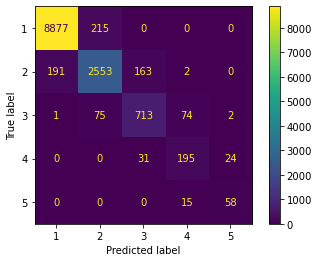

In [25]:
basari_metrikleri(X_train_sm, y_train_sm, X_test, y_test, dtree_tuned, "Decision Tree")

Logistic Regression  Train Seti için:
Precision = 0.7554981155514972
Recall = 0.7508108108108108
Accuracy = 0.7508108108108108
F1 Score = 0.7503905606520578

Logistic Regression  Test Seti için:
Precision = 0.6209998251649971
Recall = 0.7586524004526481
Accuracy = 0.902570323754644
F1 Score = 0.6559031677958579



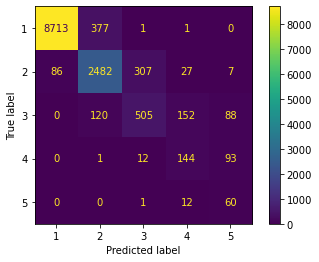

In [26]:
basari_metrikleri(X_train_sm, y_train_sm, X_test, y_test, logistic_tuned, "Logistic Regression")

Random Forest  Train Seti için:
Precision = 0.9983333525178523
Recall = 0.9983317800559182
Accuracy = 0.9983317800559179
F1 Score = 0.9983318279956341

Random Forest  Test Seti için:
Precision = 0.8354540422441682
Recall = 0.8643344636827519
Accuracy = 0.9543559026461446
F1 Score = 0.8492314062424715



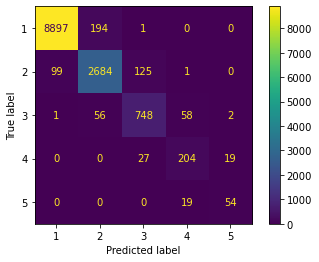

In [27]:
basari_metrikleri(X_train_sm, y_train_sm, X_test, y_test, rf_tuned, "Random Forest")

# Evaluation

- Select the best performing model and write your comments about why choose this model.  
 **Problemin konusu nedeniyle recall ve precision metriklerinden çok f1-score metriğini dikkate almayı tercih ettim. Random Forest algoritması test verisiyle birlikte en yüksek F1-score değerini verdiği için final modeli olarak seçilebilir.**  
 
 
- Analyse results and make comment about how you can improve model.  
 **Sonuçlara bakıldığında herhangi bir underfitting veya overfitting durumunun olmadığına karar verilmiştir.**  
 
 
- Modeli iyileştirmek için yapılabilecekler;  
1. Daha iyi bir sınıflandırıcı(algoritma) ile çalışılabilir. Özellikle ensemble yöntemler tercih edilebilir.
2. Veri seti üzerinde bir clustering algoritması çalıştırılarak clusterin sınıflarını belirten yeni bir değişken oluşturulabilir. Bu değişken model performansı üzerinde olumlu bir etki yapabilir.
3. Multicollinearity nedeniyle birbiriyle yüksek korelasyonlu olan x,y ve z isimli değişkenleri silmeden yeni bir model kurulabilir veya yüksek korelasyonlu bu değişkenler PCA gibi bir algoritmayla tek bileşen haline getirilerek modele verilebilir.
4. SMOTE tekniğinde hedef değişkendeki sınıfların frekanslarını eşitlemek yerine farklı oranlarla dengeyi sağlayarak çeşitli denemeler yapılabilir.
5. Değişkenlerin önem katsayıları belirlenerek yeniden değişken seçimi yapılabilir.